In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df1 = pd.read_csv('rf_classifier_10_high_complete_report.csv')
df2 = pd.read_csv('fingerprints/report.csv')
df3 = pd.read_csv('rf_classifier_50_high_complete_report.csv')

In [9]:
df_10 = pd.merge(df1, df2, left_on='ChemblID', right_on='Chembl_ID')
df_10.drop(columns='Chembl_ID', inplace= True)
df_50 = pd.merge(df3, df2, left_on='ChemblID', right_on='Chembl_ID')
df_50.drop(columns='Chembl_ID', inplace= True)
df_50.to_csv('RTK_RF_50_Report.csv', index=False)

In [35]:
df_50 = df_50.astype({'ChemblID':'category', 'prot_name':'category'})
df_50.dtypes

Model           object
Accuracy       float64
AUC            float64
Recall         float64
Prec.          float64
F1             float64
Kappa          float64
MCC            float64
ChemblID      category
prot_name     category
mol_number       int64
dtype: object

<AxesSubplot:xlabel='F1', ylabel='ChemblID'>

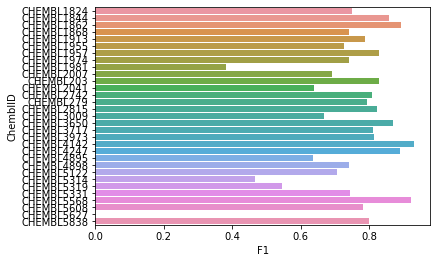

In [33]:
sns.barplot(y='ChemblID', x='F1', data=df_50)

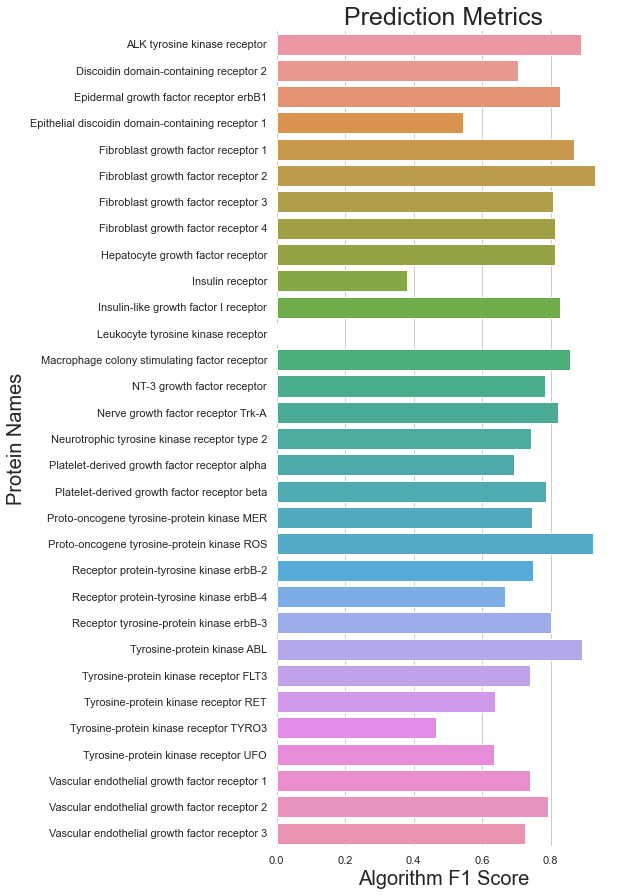

In [45]:
sns.set_theme(style='whitegrid')
f, ax = plt.subplots(figsize = (6,15))
b = sns.barplot(y='prot_name', x='F1', data=df_50)
b.axes.set_title("Prediction Metrics", fontsize = 25)
b.set_xlabel("Algorithm F1 Score", fontsize = 20)
b.set_ylabel("Protein Names", fontsize = 20)
#ax.set(title='Prediction Metrics',ylabel="Protein Names", xlabel="Algorithm F1 Score")
sns.despine(left=True, bottom=True)

In [49]:
test1 = pd.read_csv('rf_prediction_results.csv')
test2 = test1.melt(id_vars=["cmpdname"])